In [1]:
import plotnine as p9
import plotnine.data as data_sets

import calendar
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
# data = data_sets.economics
data_pure = data_sets.txhousing
# data_sets.msleep
# data = data_sets.midwest

data_pure

,city,year,month,sales,volume,median,listings,inventory,date
0,Abilene,2000,1,72.0,5380000.0,71400.0,701.0,6.3,2000.000000
1,Abilene,2000,2,98.0,6505000.0,58700.0,746.0,6.6,2000.083333
2,Abilene,2000,3,130.0,9285000.0,58100.0,784.0,6.8,2000.166667
3,Abilene,2000,4,98.0,9730000.0,68600.0,785.0,6.9,2000.250000
4,Abilene,2000,5,141.0,10590000.0,67300.0,794.0,6.8,2000.333333
...,...,...,...,...,...,...,...,...,...
8597,Wichita Falls,2015,3,152.0,16716584.0,89200.0,818.0,6.8,2015.166667
8598,Wichita Falls,2015,4,129.0,15482194.0,105300.0,760.0,6.4,2015.250000
8599,Wichita Falls,2015,5,174.0,19188181.0,100000.0,776.0,6.4,2015.333333
8600,Wichita Falls,2015,6,143.0,18820752.0,118800.0,770.0,6.2,2015.416667


In [3]:
data = data_pure

# import datetime
# datetime.datetime.strptime('3', "%m").strftime("%b")

month_numbers = data.month.unique()
month_names = [calendar.month_name[int(m)] for m in month_numbers]
months = dict(zip(month_numbers, month_names))
months

{1: 'January',
 2: 'February',
 3: 'March',
 4: 'April',
 5: 'May',
 6: 'June',
 7: 'July',
 8: 'August',
 9: 'September',
 10: 'October',
 11: 'November',
 12: 'December'}

In [4]:
# data preparation

data.replace({'month': months},  inplace=True)
data.month =  pd.Categorical(data.month, categories=list(months.values()), ordered=True)
# or: data['month'] = data.month.astype('category')

# clean data
data.volume.fillna(0, inplace=True)  # data.volume = round(data['volume'] / 1e3).astype('int')  # see below
data.sales.fillna(0, inplace=True)

# plotting properties
data['pos'] = data.volume * 1.1
data.sales = data.sales.astype('int')

exlcude_cities = ['Wichita Falls']
use_cities = ~np.isin(data.city, exlcude_cities)
data = data[use_cities]

# take only a small part of the data set
small_selection = np.isin(data.city, data.city.unique()[0:4]) & np.isin(data.year, [2013, 2014, 2015])
data = data[small_selection]
data

,city,year,month,sales,volume,median,listings,inventory,date,pos
156,Abilene,2013,January,114,1.579449e+07,125300.0,966.0,5.7,2013.000000,1.737394e+07
157,Abilene,2013,February,140,1.655264e+07,94400.0,943.0,5.6,2013.083333,1.820791e+07
158,Abilene,2013,March,164,1.960971e+07,102500.0,958.0,5.7,2013.166667,2.157068e+07
159,Abilene,2013,April,213,2.726180e+07,113700.0,948.0,5.5,2013.250000,2.998798e+07
160,Abilene,2013,May,225,3.190138e+07,130000.0,923.0,5.3,2013.333333,3.509152e+07
...,...,...,...,...,...,...,...,...,...,...
743,Austin,2015,March,2677,8.857798e+08,253900.0,5906.0,2.3,2015.166667,9.743578e+08
744,Austin,2015,April,2801,9.317447e+08,270300.0,6560.0,2.5,2015.250000,1.024919e+09
745,Austin,2015,May,2999,1.026501e+09,271200.0,7009.0,2.7,2015.333333,1.129152e+09
746,Austin,2015,June,3301,1.086690e+09,270200.0,7419.0,2.8,2015.416667,1.195359e+09


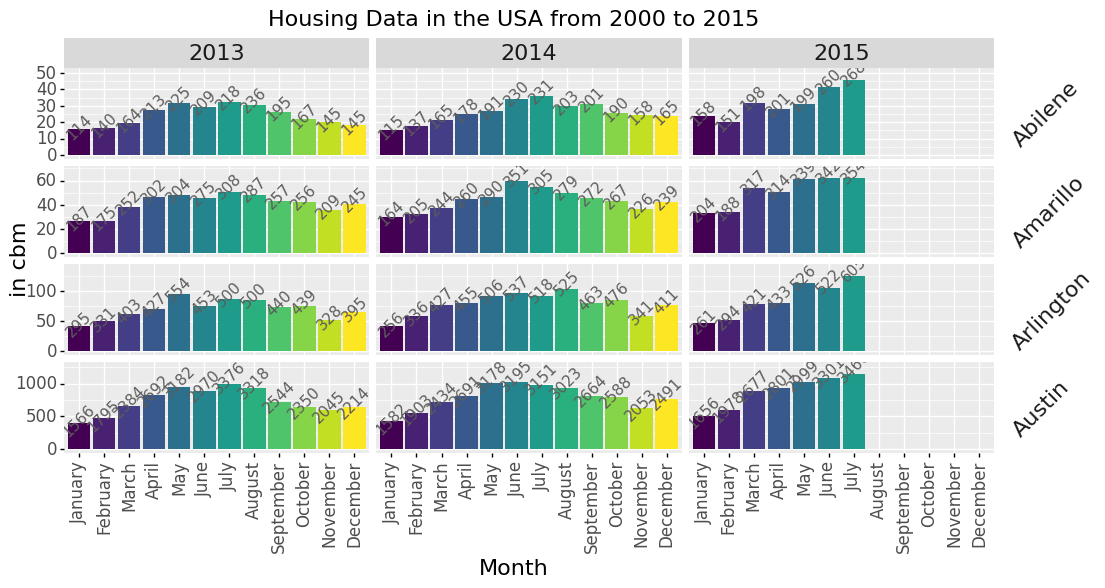

<ggplot: (8752605962295)>


In [5]:
# plot by plotnine

# TODO:

#   facet_grid y-label text box size -> make short names as SRZ, ... and don't turn axis

#   scale_colour_brewer

#   facet_grid spacing

#   axis_text (ticks)

p9.options.figure_size = (12, 5) # figure size

housing_facet_plot = (
    p9.ggplot(data=data, mapping=p9.aes(x='month', y='volume', fill='month'))
    
    + p9.geom_bar(stat="identity")

    + p9.scale_y_continuous(labels=lambda l: ["%d" % (v / 1e6) for v in l], name='in cbm') 
    # lambda l: ["%d%%" % (v * 100) for v in l]

    + p9.scale_x_discrete(name='Month')

    + p9.geom_text(p9.aes(label='sales', y='pos'), size=11, color='#5D5C5B', angle = 45) 
    # position = position_dodge(width = 0.6) 

    + p9.facet_grid('city ~ year', scales="free_y") 
    # see: https://plotnine.readthedocs.io/en/stable/generated/plotnine.facets.facet_grid.html
    
    + p9.theme(strip_text_y = p9.element_text(angle = 45)) # orientation of y-axis facet labels

    + p9.theme(strip_background_y = p9.element_text(width = 0), strip_text_y=p9.element_text(ha='left'))  
    # adjust width of facet background to fit facet text. options:, hjust=-1000

    + p9.theme(legend_position='none')

    + p9.theme(text=p9.element_text(size=16))

    + p9.theme(axis_text = p9.element_text(size = 12))
    
    + p9.theme(axis_text_x = p9.element_text(angle = 90) )

    + p9.labs(title='Housing Data in the USA from 2000 to 2015') # title

    # + p9.scale_fill_brewer(type="qual", palette="Accent")  # see: https://colorbrewer2.org/#type=sequential&scheme=BuGn&n=3  and https://plotnine.readthedocs.io/en/stable/generated/plotnine.scales.scale_color_brewer.html#plotnine.scales.scale_color_brewer

# other figure size option: + theme(figure_size = (10, 10))

)

 

print(housing_facet_plot) 

In [ ]:
# colour scales
# https://ggplot2-book.org/scale-colour.html

In [26]:
# colour brew
# ...

In [1]:
# move axis labels
# https://stackoverflow.com/questions/71001303/how-do-i-move-the-axis-labels-in-plotnine